# Task 2- To Explore Supervised Machine Learning

## Done by 
### Simran Kaur


In [65]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
#Reading and storing data
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [67]:
df.shape

(25, 2)

In [68]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [69]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


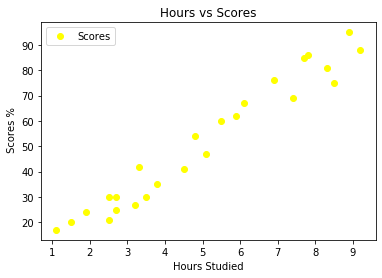

In [70]:
# Visualizing the relationship between these columns
df.plot(x='Hours', y='Scores', style='o',c='yellow')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel(' Scores %')
plt.show()

In [71]:
X=df.iloc[:,:-1].values  #all columns except last one
Y=df.iloc[:,1].values  #last column

In [72]:
# Splitting data into train and test set. Here model will train its parameters by train set and then predict on test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0) 
#test_size=0.25 means 25% of total data is in test set and 75% of remaining data is in train set

In [73]:
# now shape of our data
print("X_train  y_train : ",X_train.shape,y_train.shape)
print("X_test, y_test : ",X_test.shape,y_test.shape)

X_train  y_train :  (18, 1) (18,)
X_test, y_test :  (7, 1) (7,)


## Training Model

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
#training on X_train ,y_train and learning the parameters for best fitted line i.e best value for slope and intercept

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
#we can also see the value of slope and intercept
print("Intercept of predicted best fitted line ",regressor.intercept_)
print("Slope of predicted best fitted line",regressor.coef_)

Intercept of predicted best fitted line  1.932204253151646
Slope of predicted best fitted line [9.94167834]


### Making Predictions

In [76]:
y_pred = regressor.predict(X_test)

In [77]:
# lets see the actual y_test and predicted values of the model(y_pred)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Residuals': y_pred-y_test})
df1

,Actual,Predicted,Residuals
0,20,16.844722,-3.155278
1,27,33.745575,6.745575
2,69,75.500624,6.500624
3,30,26.786400,-3.213600
4,62,60.588106,-1.411894
5,35,39.710582,4.710582
6,24,20.821393,-3.178607


### Visualizing Line

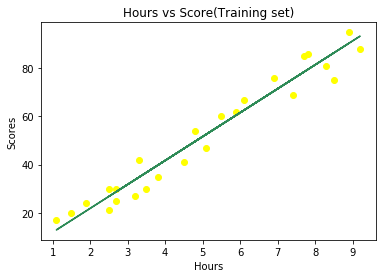

In [78]:
plt.scatter(X,Y,c='yellow')
plt.plot(X_train,regressor.predict(X_train),color='seagreen')
plt.title('Hours vs Score(Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Evaluating Performance of Algorithm

Text(0, 0.5, 'Residual')

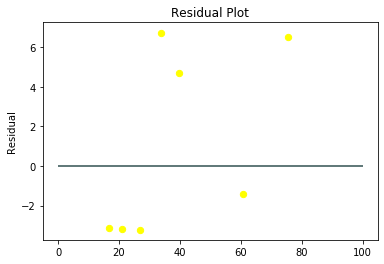

In [79]:
# Residual Plot
plt.scatter(y_pred,y_pred-y_test,c='yellow',s=40)
plt.hlines(y=0,xmin=0,xmax=100,colors='darkslategray')
plt.title("Residual Plot")
plt.ylabel("Residual")

In [80]:
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)
# if it is 1, the two variables are perfectly correlated, i.e., 
#with no variance at all. A low value would show a low level of correlation, meaning a regression model  is not valid

coefficient of determination: 0.9484509249326872


In [83]:
#checking for mean error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


In [82]:
# Now predict for 9.25 hours
ques=[[9.25]]
ans=regressor.predict(ques)
print(" if a student study for 9.25 hrs in a day then its predicted score will be ",ans[0])

 if a student study for 9.25 hrs in a day then its predicted score will be  93.89272889341655


# Thank You!